<a href="https://colab.research.google.com/github/siva-sankar-a/erav1/blob/main/session_7_8k_15_epochs/Session_7_step_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERA V1 Session 7
## Refer [link](https://github.com/siva-sankar-a/erav1/tree/session/session-6-multiple-architecture-check/session_6_multiple_architectures_mnist#readme) for further documentation

## Cloning the Github repository
## [Session 7](https://github.com/siva-sankar-a/erav1.git)

In [ ]:
!git clone https://github.com/siva-sankar-a/erav1.git

Cloning into 'erav1'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 144 (delta 69), reused 67 (delta 24), pack-reused 0
Receiving objects: 100% (144/144), 557.32 KiB | 6.12 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [ ]:
%cd /content/erav1

/content/erav1


In [ ]:
!git pull

remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 6), reused 3 (delta 3), pack-reused 0
Unpacking objects: 100% (8/8), 1.77 KiB | 908.00 KiB/s, done.
From https://github.com/siva-sankar-a/erav1
   f48fe5a..5ce4689  main       -> origin/main
   12986e9..39109ee  sandbox    -> origin/sandbox
   b9a5f9c..71ebe89  session/session-6-multiple-architecture-check -> origin/session/session-6-multiple-architecture-check
Updating f48fe5a..5ce4689
Fast-forward
 session_6_multiple_architectures_mnist/utils.py | 9 +++++++++
 1 file changed, 9 insertions(+)


## Adding the session folder to path in order to access the functions defined

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os
import sys

In [ ]:
sys.path.append('/content/erav1/session_6_multiple_architectures_mnist/')

In [ ]:
import importlib

In [ ]:
import utils as U

In [ ]:
U = importlib.reload(U)

## Get device

In [ ]:
device = U.get_device()
print(device)

CUDA Available? True
cuda


In [ ]:
import pandas as pd

In [ ]:
pd.options.plotting.backend = "plotly"

## Get train and test transforms

In [ ]:
train_transforms = U.get_train_transforms()
test_transforms = U.get_test_transforms()

In [ ]:
from torchvision import datasets, transforms

In [ ]:
from torch.utils.data import WeightedRandomSampler

In [ ]:
train_transforms = transforms.Compose([
                                    transforms.RandomRotation((-5.0, 5.0), fill=(1,)),
                                    # transforms.ElasticTransform(alpha=100.0, sigma=5.0, interpolation=transforms.InterpolationMode.NEAREST),
                                    # transforms.RandomInvert(p=0.5),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                    ])

In [ ]:
test_transforms = transforms.Compose([
                                    # transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                    ])

## Get dataset

In [ ]:
train_dataset = U.get_train_dataset(train_transforms)
test_dataset = U.get_test_dataset(test_transforms)

## Get train and test dataloader

In [ ]:
import torch

In [ ]:
label_weights = { 0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}

In [ ]:
_weights = [label_weights[label] for label in train_dataset.targets.cpu().tolist()]

In [ ]:
batch_size = 128
sampler = torch.utils.data.sampler.WeightedRandomSampler(_weights, len(train_dataset), replacement=False)

In [ ]:
kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

train_dataloader = U.get_train_dataloader(train_dataset, sampler=sampler, **kwargs)
test_dataloader = U.get_test_dataloader(test_dataset, **kwargs)

## Display image grid

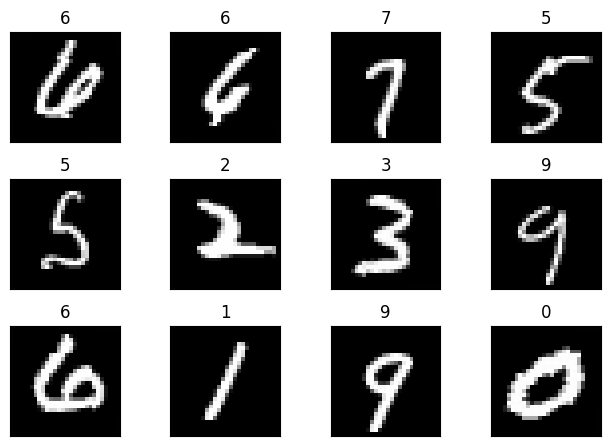

In [ ]:
U.show_image_grid(train_dataloader)

In [ ]:
!git clone https://github.com/Fangyh09/pytorch-receptive-field.git

fatal: destination path 'pytorch-receptive-field' already exists and is not an empty directory.


In [ ]:
sys.path.append('/content/erav1/pytorch-receptive-field')

In [ ]:
from torch_receptive_field import receptive_field

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):

    '''
    This class implements the neural network model

    Usage:
    >>> device = ...
    >>> model = Net().to('cpu')
    '''

    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = self.conv3x3_bn_dropout(1, 8, padding=1)
        self.conv2 = self.conv3x3_bn_dropout(8, 8)

        # self.squeeze1 = self.conv1x1(4, 1)

        self.conv3 = self.conv3x3_bn_dropout(8, 8, padding=1)
        self.conv4 = self.conv3x3_bn_dropout(8, 8)
        self.conv5 = self.conv3x3_bn_dropout(8, 8)
        self.conv6 = self.conv3x3_bn_dropout(8, 8, stride=2)

        # self.squeeze2 = self.conv1x1(8, 1)

        self.conv7 = self.conv3x3_bn_dropout(8, 8, padding=1)
        self.conv8 = self.conv3x3_bn_dropout(8, 8)
        self.conv9 = self.conv3x3_bn_dropout(8, 16)
        self.conv10 = self.conv3x3_bn_dropout(16, 16)

        self.gap = nn.AvgPool2d(4)
        self.mixer = nn.Sequential(
            self.conv1x1(16, 10),
        )


    def conv3x3_bn_dropout(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, bias=False, dropout=0.1):
          if dropout:
            return nn.Sequential(
                self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, bias),
                nn.ReLU(),
                nn.BatchNorm2d(out_channels),
                nn.Dropout(dropout),
                )
          else:
            return nn.Sequential(
                self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, bias),
                nn.ReLU(),
                nn.BatchNorm2d(out_channels),
                )

    def conv3x3(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)

    def conv1x1(self, in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # x = self.squeeze1(x)

        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        # x = self.squeeze2(x)

        x = self.conv7(x)
        x = self.conv8(x)
        x = self.conv9(x)
        x = self.conv10(x)

        x = self.gap(x)
        x = self.mixer(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=1)

## Generate model summary

In [ ]:
model = Net().to('cpu')
U.show_summary(model, 1024, 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1024, 8, 28, 28]              72
              ReLU-2          [1024, 8, 28, 28]               0
       BatchNorm2d-3          [1024, 8, 28, 28]              16
           Dropout-4          [1024, 8, 28, 28]               0
            Conv2d-5          [1024, 8, 26, 26]             576
              ReLU-6          [1024, 8, 26, 26]               0
       BatchNorm2d-7          [1024, 8, 26, 26]              16
           Dropout-8          [1024, 8, 26, 26]               0
            Conv2d-9          [1024, 8, 26, 26]             576
             ReLU-10          [1024, 8, 26, 26]               0
      BatchNorm2d-11          [1024, 8, 26, 26]              16
          Dropout-12          [1024, 8, 26, 26]               0
           Conv2d-13          [1024, 8, 24, 24]             576
             ReLU-14          [1024, 8,

In [ ]:
receptive_field(model.cpu(), input_size=(1, 28, 28), device='cpu')

## Training

In [ ]:
model = Net().to(device)

In [ ]:
import torch.optim as optim

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
num_epochs = 20

metrics = { 'train_acc': [], 'train_losses': [],
            'test_acc': [], 'test_losses': [] }

for epoch in range(1, num_epochs + 1):
    print(f'Epoch {epoch}')
    U.train(model, device, train_dataloader, optimizer, metrics)
    U.test(model, device, test_dataloader, metrics)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.0343 Batch_id=468 Accuracy=92.34: 100%|██████████| 469/469 [00:25<00:00, 18.43it/s]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       0.99      0.99      0.99      1133
           2       0.98      0.98      0.98      1029
           3       0.98      0.99      0.98       999
           4       0.98      0.99      0.98       977
           5       0.99      0.98      0.98       903
           6       0.99      0.98      0.98       970
           7       0.98      0.97      0.98      1039
           8       0.98      0.99      0.99       962
           9       0.98      0.98      0.98      1010

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Test set: Average loss: 0.0498, Accuracy: 9839/10000 (98.39%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=0.0337 Batch_id=468 Accuracy=97.46: 100%|██████████| 469/469 [00:24<00:00, 18.95it/s]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.98      0.99      1043
           3       0.99      0.99      0.99      1010
           4       0.95      1.00      0.98       937
           5       0.99      0.98      0.99       899
           6       0.99      0.99      0.99       950
           7       0.99      0.99      0.99      1030
           8       0.99      0.99      0.99       970
           9       0.99      0.96      0.97      1046

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0383, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.0485 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:24<00:00, 18.78it/s]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       979
           1       0.99      0.99      0.99      1134
           2       0.99      0.99      0.99      1030
           3       0.99      1.00      0.99      1006
           4       0.99      0.99      0.99       984
           5       0.99      0.99      0.99       893
           6       0.99      0.98      0.99       969
           7       0.98      0.99      0.99      1017
           8       0.99      0.99      0.99       967
           9       0.99      0.98      0.98      1021

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0331, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.0202 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:24<00:00, 19.04it/s]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       986
           1       0.99      0.99      0.99      1133
           2       0.99      0.99      0.99      1033
           3       0.99      0.99      0.99      1007
           4       0.99      0.99      0.99       989
           5       0.99      0.98      0.99       897
           6       0.99      0.98      0.99       965
           7       0.98      1.00      0.99      1014
           8       0.99      0.99      0.99       978
           9       0.98      0.99      0.98       998

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0349, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.0343 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:24<00:00, 19.06it/s]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       978
           1       1.00      0.99      1.00      1146
           2       0.99      0.98      0.99      1043
           3       0.99      1.00      0.99      1003
           4       0.99      1.00      0.99       973
           5       0.99      0.99      0.99       891
           6       1.00      0.99      0.99       970
           7       0.98      0.99      0.99      1013
           8       0.99      0.99      0.99       977
           9       0.99      0.99      0.99      1006

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0291, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6


Train: Loss=0.0431 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:24<00:00, 18.84it/s]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       996
           1       1.00      0.99      0.99      1143
           2       1.00      0.99      0.99      1040
           3       0.99      0.99      0.99      1007
           4       0.99      1.00      0.99       975
           5       0.99      0.99      0.99       892
           6       0.98      1.00      0.99       944
           7       0.98      0.99      0.99      1018
           8       0.99      1.00      0.99       967
           9       0.99      0.98      0.99      1018

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0285, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0356 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:25<00:00, 18.18it/s]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       982
           1       1.00      0.99      1.00      1141
           2       1.00      0.99      0.99      1037
           3       0.99      0.99      0.99      1008
           4       0.99      1.00      0.99       974
           5       0.99      0.99      0.99       894
           6       0.99      1.00      1.00       957
           7       0.99      0.99      0.99      1023
           8       0.99      1.00      0.99       968
           9       0.99      0.99      0.99      1016

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0212, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0625 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:23<00:00, 19.60it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       1.00      0.99      1.00      1140
           2       1.00      0.99      1.00      1034
           3       0.99      0.99      0.99      1009
           4       0.99      1.00      0.99       980
           5       0.99      0.99      0.99       894
           6       0.99      1.00      0.99       956
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       968
           9       0.99      0.99      0.99      1010

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0198, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0180 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:23<00:00, 19.55it/s]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       983
           1       1.00      0.99      1.00      1141
           2       1.00      0.99      0.99      1033
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      1.00       983
           5       0.99      0.99      0.99       894
           6       1.00      1.00      1.00       957
           7       0.99      0.99      0.99      1025
           8       0.99      1.00      0.99       971
           9       0.99      0.99      0.99      1003

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0197, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0307 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:24<00:00, 19.18it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       1.00      0.99      0.99      1143
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1008
           4       0.99      1.00      1.00       980
           5       0.99      0.99      0.99       894
           6       0.99      1.00      0.99       954
           7       0.99      0.99      0.99      1029
           8       0.99      1.00      0.99       969
           9       0.99      0.99      0.99      1010

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0197, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0369 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:24<00:00, 18.94it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1141
           2       0.99      1.00      0.99      1028
           3       0.99      0.99      0.99      1009
           4       0.99      1.00      1.00       979
           5       0.99      0.99      0.99       893
           6       1.00      0.99      1.00       959
           7       0.99      0.99      0.99      1031
           8       0.99      1.00      0.99       970
           9       0.99      0.99      0.99      1010

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0192, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0223 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:25<00:00, 18.75it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1142
           2       0.99      1.00      0.99      1031
           3       1.00      0.99      0.99      1011
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       959
           7       0.99      0.99      0.99      1025
           8       0.99      1.00      1.00       967
           9       0.99      0.99      0.99      1011

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0192, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0242 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:24<00:00, 19.05it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1143
           2       0.99      1.00      0.99      1030
           3       1.00      0.99      0.99      1011
           4       0.99      1.00      1.00       979
           5       0.99      0.99      0.99       894
           6       0.99      1.00      1.00       957
           7       0.99      0.99      0.99      1026
           8       0.99      1.00      0.99       969
           9       0.99      0.99      0.99      1011

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0189, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0426 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:24<00:00, 18.94it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1141
           2       0.99      1.00      0.99      1031
           3       0.99      0.99      0.99      1009
           4       0.99      1.00      1.00       980
           5       0.99      0.99      0.99       893
           6       1.00      1.00      1.00       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       968
           9       0.99      0.99      0.99      1012

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0188, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0674 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:24<00:00, 18.84it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1142
           2       0.99      1.00      0.99      1031
           3       0.99      0.99      0.99      1009
           4       1.00      1.00      1.00       981
           5       0.99      0.99      0.99       893
           6       1.00      1.00      1.00       958
           7       0.99      0.99      0.99      1027
           8       0.99      1.00      1.00       967
           9       0.99      0.99      0.99      1012

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0188, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0074 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:26<00:00, 18.00it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1142
           2       0.99      1.00      0.99      1031
           3       0.99      0.99      0.99      1009
           4       0.99      1.00      1.00       980
           5       0.99      0.99      0.99       893
           6       1.00      1.00      1.00       958
           7       0.99      0.99      0.99      1027
           8       0.99      1.00      0.99       969
           9       0.99      0.99      0.99      1011

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0188, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0352 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:24<00:00, 18.93it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1142
           2       1.00      1.00      1.00      1032
           3       1.00      0.99      0.99      1011
           4       0.99      1.00      1.00       980
           5       0.99      0.99      0.99       894
           6       1.00      1.00      1.00       958
           7       0.99      0.99      0.99      1024
           8       0.99      1.00      0.99       971
           9       0.99      0.99      0.99      1008

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0189, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0029 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:24<00:00, 18.84it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       1.00      0.99      1.00      1142
           2       1.00      1.00      1.00      1032
           3       0.99      0.99      0.99      1009
           4       1.00      0.99      1.00       983
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       959
           7       0.99      0.99      0.99      1026
           8       0.99      1.00      0.99       968
           9       0.99      0.99      0.99      1008

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0189, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=0.0036 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:24<00:00, 19.15it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       1.00      0.99      1.00      1142
           2       1.00      1.00      1.00      1032
           3       0.99      0.99      0.99      1009
           4       0.99      1.00      1.00       979
           5       0.99      0.99      0.99       893
           6       1.00      0.99      1.00       959
           7       0.99      0.99      0.99      1026
           8       0.99      1.00      0.99       971
           9       0.99      0.99      0.99      1008

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0189, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=0.0022 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:24<00:00, 19.47it/s]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1141
           2       0.99      1.00      0.99      1030
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       979
           5       0.99      0.99      0.99       893
           6       1.00      1.00      1.00       958
           7       0.99      0.99      0.99      1029
           8       0.99      1.00      0.99       968
           9       0.99      0.99      0.99      1012

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Test set: Average loss: 0.0190, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-04.


## Display Results

In [ ]:
df = pd.DataFrame(metrics)

In [ ]:
df[['train_losses', 'test_losses']].plot()

In [ ]:
df[['train_acc', 'test_acc']].plot()